# Relative feature tightness of fragments using part 7 for test data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

## Dataset prep

### Making feature pointwise mutual information profiles

In [3]:
profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp0_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp1_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp2_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp3_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp4_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp5_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp6_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp8_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp9_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)

In [4]:
profile0.add_another_cooccurrence_profile(profile1)
profile0.add_another_cooccurrence_profile(profile2)
profile0.add_another_cooccurrence_profile(profile3)
profile0.add_another_cooccurrence_profile(profile4)
profile0.add_another_cooccurrence_profile(profile5)
profile0.add_another_cooccurrence_profile(profile6)
profile0.add_another_cooccurrence_profile(profile8)
profile0.add_another_cooccurrence_profile(profile9)

In [5]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile0)

In [6]:
reference_profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp0_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp1_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp2_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp3_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp4_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp5_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp6_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp8_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp9_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)

In [7]:
reference_profile0.add_another_cooccurrence_profile(reference_profile1)
reference_profile0.add_another_cooccurrence_profile(reference_profile2)
reference_profile0.add_another_cooccurrence_profile(reference_profile3)
reference_profile0.add_another_cooccurrence_profile(reference_profile4)
reference_profile0.add_another_cooccurrence_profile(reference_profile5)
reference_profile0.add_another_cooccurrence_profile(reference_profile6)
reference_profile0.add_another_cooccurrence_profile(reference_profile8)
reference_profile0.add_another_cooccurrence_profile(reference_profile9)

In [8]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile0)

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [9]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1                           feature2                                                
[CH2][CH2][CH2][CH2][CH]           [CH2][CH2][CH2][CH2][CH]                        1.851986
                                   [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]  3.431963
                                   [CH2][CH2][C](=[O])[CH]([CH2])[CH]              5.376253
                                   [CH3][CH2][CH2][CH2]                            4.158487
                                   [CH3][CH2][CH2][CH2][CH2]                       4.419948
...                                                                                     ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]              -0.027473
                                   [C][CH]([CH2])[NH][CH2][S]                     -0.027473
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]                     -0.027473
                                   [C][CH]([NH])[CH2][CH2][S]                     -0.027473
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]                     -0.027473

[28962537 rows x 1 columns]

### Sampling structures from COCONUT and ZINC datasets

In [10]:
coconut_samples = pd.read_csv('../data/CPF/COCONUT/COCOrandomF.csv', delimiter = ' ')
coconut_samples = coconut_samples.drop(['Coconut_id'], axis=1)
coconut_samples['Name'] = 'COCONUT'

In [11]:
df_split_coco = np.array_split(coconut_samples, 10)

In [12]:
df_split_coco[7]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments
270410,C1CCC(C23CC(CC4CCCN=C42)C2CCCCN2C3)NC1,315.267448,3.2440,LHZDKNLVYWYRSS-UHFFFAOYSA-N,LHZDKNLVYWYRSS,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[33, 51, 118, 162, 264, 305, 313, 325, 378, 50...","'[CH2][CH2][CH2][CH]([CH])[N]', '[CH][CH2][CH2..."
270411,COc1cccc(C=CC(O)C(O)C(O)C(C)OC)c1CO,312.157288,0.3183,ODQVGZIJMRNPQK-UHFFFAOYSA-N,ODQVGZIJMRNPQK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 40, 80, 146, 210, 222, 227, 249, 283, 368,...","'[cH][cH][c]([O][CH3])[c]([c])[CH2]', '[cH][c]..."
270412,COc1ccc(CNC(=O)c2cc3c([nH]c4ccccc43)c(-c3ccc(C...,449.210327,6.4451,QRNUBGNGCMKPQO-UHFFFAOYSA-N,QRNUBGNGCMKPQO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 68, 80, 119, 197, 223, 255, 283, 310, 322,...","'[cH][cH][c]([cH][cH])-[c]([c])[n]', '[cH][cH]..."
270413,CC(=O)OC(CCC(C)=CCCC(=O)c1ccc(O)cc1O)C(C)(O)CC...,432.251189,5.2163,JDVWBXDBNKCEEE-UHFFFAOYSA-N,JDVWBXDBNKCEEE,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 24, 67, 69, 80, 114, 205, 237, 357, 370, 3...","'[C][c]([c])[cH][cH][c]', '[C][c]([cH])[c]([OH..."
270414,COCNc1cc2c3c([nH+]1)-n1cc4cc(C56CCOCC5CCc5cccc...,1004.484442,10.6355,ANWQUIINLJNKGK-UHFFFAOYSA-O,ANWQUIINLJNKGK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[22, 48, 49, 58, 65, 80, 95, 104, 128, 155, 21...","'[c][c]([c])[CH2][O][CH]', '[cH][cH][cH][cH][c..."
...,...,...,...,...,...,...,...,...,...
309034,S=C(NNc1ccccc1)NC(c1ccccc1)(c1ccccc1)c1ccccc1,409.161269,5.4697,RFKBPYKOKYSLIQ-UHFFFAOYSA-N,RFKBPYKOKYSLIQ,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[97, 105, 110, 114, 191, 354, 389, 639, 696, 7...","'[cH][cH][cH][cH][cH]', '[cH][cH][c]([cH][cH])..."
309035,COc1cc(C(O)C(O)OC2OC(COC(=O)C=Cc3cc(OC)c(O)c(O...,568.179206,-0.4438,LTEDCNNXJUTLEF-UHFFFAOYSA-N,LTEDCNNXJUTLEF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 31, 58, 80, 147, 176, 202, 220, 227, 249, ...","'[CH2][CH]([CH])[O][CH]([CH])[O]', '[cH][cH][c..."
309036,CC(=O)OC1CC2(C)C3CC(OC4OC(CO)C(O)C(O)C4O)C4C(C...,910.492601,2.4365,GZJSPFHGRIJXBF-UHFFFAOYSA-N,GZJSPFHGRIJXBF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 114, 176, 222, 242, 249, 260, 267, 303, 3...","'[CH3][C](=[O])[O][CH]([CH])[CH]', '[CH2][CH2]..."
309037,CC(C)=CCCC(C)C1CC(O)C2(C)C3=CCC4C(C)(CCC(O)C4(...,440.365431,7.2259,CCFQLQIYEHITNK-UHFFFAOYSA-N,CCFQLQIYEHITNK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 8, 61, 63, 80, 111, 137, 203, 283, 401, 44...",'[CH][CH2][CH]([C]([C])([CH3])[CH2])[C]([CH])(...


In [13]:
zinc_samples = pd.read_csv('../data/CPF/ZINC/ZINCrandomF.csv', delimiter = ' ')
zinc_samples = zinc_samples.drop(['Zinc_id'], axis=1)

In [14]:
df_split_zinc = np.array_split(zinc_samples, 10)
df_split_zinc[7]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments
265309,Cc1cnnc(N2CCS[C@H](C(F)(F)F)C2)c1,263.070403,2.26912,NFKXVPWUFOJQHO-QMMMGPOBSA-N,NFKXVPWUFOJQHO,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[114, 177, 241, 255, 281, 377, 378, 407, 436, ...","'[c][N]([CH2])[CH2][CH2][S]', '[CH][S][CH2][CH..."
265310,CC1=N[C@@H]2NN=CN2C(O)=C1,152.069811,-0.00760,JVTCVGIAQSOTBK-ZCFIWIBFSA-N,JVTCVGIAQSOTBK,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[84, 106, 300, 378, 384, 397, 519, 739, 807, 8...","'[C][N]([CH])[CH]=[N][NH]', '[CH][NH][N]=[CH][..."
265311,CCCCC(CCCC)c1ccnc(N)c1,220.193949,4.12780,CZBMURBNJQQQDC-UHFFFAOYSA-N,CZBMURBNJQQQDC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 62, 80, 143, 294, 377, 378, 591, 627, 739,...","'[c][cH][c]([NH2])[n][cH]', '[CH3][CH2][CH2][C..."
265312,CC(C)CCN1C[C@@H]2OCCN(c3ncc(F)cn3)[C@@H]2C1,294.185590,1.55120,DUGKINZEMKOWKF-KGLIPLIRSA-N,DUGKINZEMKOWKF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 21, 68, 80, 102, 283, 340, 378, 656, 667, ...","'[cH][n][c]([n][cH])[N]([CH2])[CH]', '[CH2][CH..."
265313,O=C(Cc1ccc(F)cc1)Nc1nnc(-c2ccccc2)s1,313.068511,3.52540,MDWISCUYGLSIGD-UHFFFAOYSA-N,MDWISCUYGLSIGD,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 90, 162, 310, 325, 378, 385, 389, 650...","'[c]-[c]([s])[n][n][c]', '[C][CH2][c]([cH][cH]..."
...,...,...,...,...,...,...,...,...,...
303205,CCOC(=O)c1c(NC(=O)c2cc(-c3ccc(CC)cc3)nc3ccccc2...,484.182064,6.83350,HMHFQFSULDXOOG-UHFFFAOYSA-N,HMHFQFSULDXOOG,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 42, 50, 54, 80, 145, 147, 162, 216, 220, 2...","'[c]-[c]([cH])[n][c]([cH])[c]', '[cH][cH][c]([..."
303206,CN(C)c1nccnc1[C@H]1CN(Cc2cc3ccccc3s2)CCO1,354.151432,3.33080,FUFKNLNNLYPNRI-MRXNPFEDSA-N,FUFKNLNNLYPNRI,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 95, 162, 259, 377, 378, 388, 461, 556, 65...","'[cH][cH][cH][c]([c])[s]', '[c][CH2][N]([CH2][..."
303207,COc1ccc(-c2oc3ncn4nc(CSc5nc6ccccc6o5)nc4c3c2-c...,535.131425,6.65520,ZFGYKGBESMBREX-UHFFFAOYSA-N,ZFGYKGBESMBREX,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 115, 116, 147, 153, 212, 289, 322, 341, 3...","'[c][c]([n])[n][c]([CH2])[n]', '[cH][cH][c]([c..."
303208,Cc1sc(NC(=O)c2ccccn2)c(C(N)=O)c1C,275.072848,2.11114,XXDWSRDIRVDROE-UHFFFAOYSA-N,XXDWSRDIRVDROE,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 50, 122, 140, 162, 214, 216, 252, 309, 313...","'[c][NH][C](=[O])[c]([cH])[n]', '[C][c]([cH])[..."


In [15]:
joint_samples = pd.concat((df_split_coco[7], df_split_zinc[7]), ignore_index=True)

In [16]:
for x in joint_samples.index:
    a = joint_samples['Fragments'][x]
    tup = literal_eval(a)
    joint_samples['Fragments'][x] = tup

/var/tmp/pbs.43587.lich-compute.vscht.cz/ipykernel_36566/2190264476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_samples['Fragments'][x] = tup


## Relative feature tightness against a PMI interrelation profile

In [17]:
joint_samples['RFT'] = joint_samples['Fragments'].apply(
    lambda x: difference_pkld_profile.relative_feature_divergence(x))

/home/liskovaf/.conda/envs/coco/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


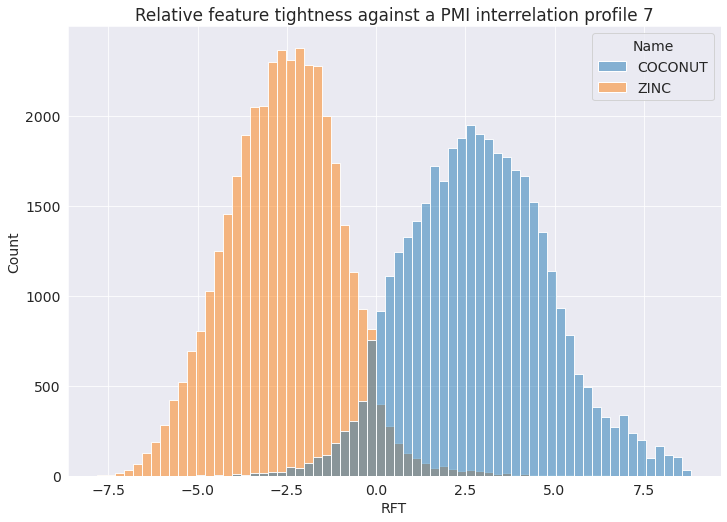

In [18]:
plt.rcParams['font.size'] = '14'
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(joint_samples, x='RFT', hue='Name')
plt.title('Relative feature tightness against a PMI interrelation profile 7')
plt.savefig(f"../images//joint_samples_RFT7F.svg", format="svg")

According to the histogram, there is a visible split between Relative feature tightness distribution against the pointwise KL divergence profile between COCONUT and ZINC datasets, based on their radius 2 fragments. Larger fragments might diverge even further.

# ROC curve

In [19]:
joint_samples[joint_samples['RFT'].isna()]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments,RFT
52087,O=S(=O)=O,79.956815,-1.0041,AKEJUJNQAAGONA-UHFFFAOYSA-N,AKEJUJNQAAGONA,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[427, 650, 1204, 1265]",{},NaN
61082,O=[Sn](O)O,169.902589,-1.6136,AUYOHNUMSAGWQZ-UHFFFAOYSA-L,AUYOHNUMSAGWQZ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[650, 779, 807, 1177, 1415, 1913]",{},NaN
61701,[BH3-]N(C)C,58.083353,-1.1716,GEERNEKFBDCHJJ-UHFFFAOYSA-N,GEERNEKFBDCHJJ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[390, 725, 843, 881, 1057, 1163]",{},NaN
63073,[O-][I+3]([O-])([O-])O,191.891957,-7.1200,WXSIPUYRSBVXGK-UHFFFAOYSA-N,WXSIPUYRSBVXGK,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[317, 700, 715, 807, 1117, 1967]",{},NaN
64909,CC(C)(Cl)Br,155.934140,2.3562,YSQXISYCKHFJFJ-UHFFFAOYSA-N,YSQXISYCKHFJFJ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[114, 384, 392, 728, 803, 1057, 1683, 1873]",{},NaN
65539,NS(N)(=O)=O,95.999348,-1.8514,NVBFHJWHLNUMCV-UHFFFAOYSA-N,NVBFHJWHLNUMCV,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[350, 650, 1117, 1171, 1476, 1607]",{},NaN


In [20]:
joint_samples = joint_samples[joint_samples['RFT'].notna()]

In [21]:
joint_samples[joint_samples['RFT'].isna()]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments,RFT


In [22]:
from matplotlib.pyplot import figure
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(joint_samples['Name'], joint_samples['RFT'], pos_label = 'COCONUT')
roc_auc = metrics.auc(fpr, tpr)

In [23]:
roc_auc

0.9860297998364179

<Figure size 432x288 with 0 Axes>

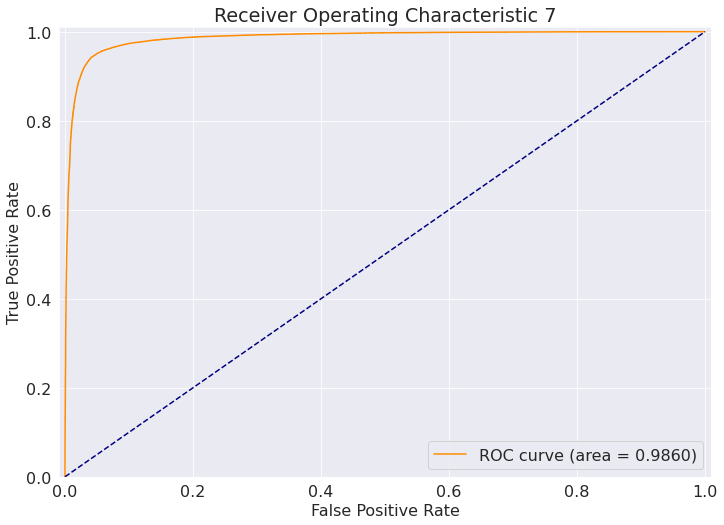

In [24]:
plt.rcParams['font.size'] = '16'
plt.figure()
figure(figsize=(11.7, 8.27))
plt.plot(fpr,tpr,color="darkorange",label="ROC curve (area = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic 7')
plt.legend(loc="lower right")
plt.savefig(f"../images//joint_samples_ROC7F.svg", format="svg")
plt.show()